### Normalização dos dados

In [3]:
#!pip install biokit

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('wine.txt') 
df = df.rename(columns = {'Alcohol' : 'Alcool', 
                          'Ash' : 'Po', 
                          'Ash_Alcalinity': 'Alcalinidade_po',
                          'Magnesium' : 'Magnesio',
                          'Total_Phenols' : 'Total_Fenois',
                          'Nonflavanoid_Phenols':'Fenois_nao_flavalonoides',
                          'Color_Intensity':'Intensidade_de_cor'})

colunas = df.columns

In [ ]:
#df.describe()

C:\Users\lucas\AppData\Local\Temp\ipykernel_1072\1915024463.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


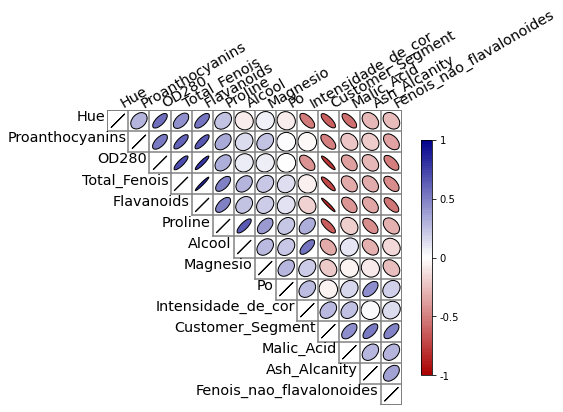

In [5]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

matriz_corr = df.corr()
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()

In [6]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_df, columns=colunas)
df.describe()


,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### K-Means

In [7]:
#!pip install plotly
from sklearn.cluster import KMeans
import plotly.graph_objects as go

agrupador = KMeans(n_clusters=3)
agrupador.fit(df)

labels = agrupador.labels_

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'], y = df['Alcool'],mode = 'markers', marker = dict(color = labels.astype(float)), text = labels))                  
fig.show()

In [9]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = colunas
centros.head()

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'], y = df['Alcool'], z = df['Proline'], mode = 'markers', marker = dict(color = agrupador.labels_.astype(np.float)), text = [0, 1, 2]))
fig.update_layout(scene = dict(xaxis_title='Intensidade de Cor', yaxis_title='Àlcool', zaxis_title='Proline'))
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'], y = centros['Alcool'], z=centros['Proline'], mode = 'markers', marker = dict(color = 'red'), text = [0, 1, 2]))
fig.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_1072\2680936755.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



### DBSCAN

In [10]:
from sklearn.cluster import DBSCAN
agrupador = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [11]:
np.unique(agrupador.labels_)

array([-1,  0,  1,  2], dtype=int64)

In [12]:
agrupador = DBSCAN(eps = 0.5, min_samples = 15, metric = 'euclidean')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  2,  2, -1, -1, -1,
       -1, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

In [18]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [20]:
BW = estimate_bandwidth(df, quantile = 0.2)
agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

### Coeficiente de silhueta

In [47]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score
import numpy as np

agrupador_kmeans = KMeans(n_clusters = 3)
agrupador_DBSCAN = DBSCAN(eps = 2.1, min_samples = 56, metric = 'manhattan')

labels_kmeans = agrupador_kmeans.fit_predict(df)
labels_dbscan = agrupador_DBSCAN.fit_predict(df)

print("Labels K-means: ", labels_kmeans)
print("Labels DBSCAN: ", labels_dbscan)

Labels K-means:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Labels DBSCAN:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0 -1  0  0  0 -1 -1 -1  0
  0 -1  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1  0 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [48]:
print("O coeficiente de silhueta do K-means é:", silhouette_score(df, labels_kmeans))
print("O coeficiente de silhueta do DBSCAN é: ", silhouette_score(df,labels_dbscan))

O coeficiente de silhueta do K-means é: 0.36950618492736303
O coeficiente de silhueta do DBSCAN é:  0.3016232115094375
